# Relation de conjugaison, cas de la lentille convergente

Notebook jupyter utilisé dans la video https://www.youtube.com/watch?v=bcajFxGgpvo .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as fu

Les données sont en cm ici.

In [2]:
d_lentille=np.array([29.5,71.5,60,53.5,45.5,40,34.5])
delta_lentille=0.1
d_min=np.array([93.5,99.6,90.2,85.7,81.6,80.5,83.2])
d_max=np.array([95,99.9,90.6,86,82,80.9,84.1])
t_min=np.array([7.5,1.4,1.7,2,2.7,3.4,4.6])
t_max=np.array([7.75,1.6,1.8,2.1,2.75,3.55,4.8])
t0=3.475

In [3]:
d_objet=d_lentille
d_image=(d_max+d_min)/2-d_lentille
delta_d=(d_max-d_min)/2
t=(t_max+t_min)/2
delta_t=(t_max-t_min)/2

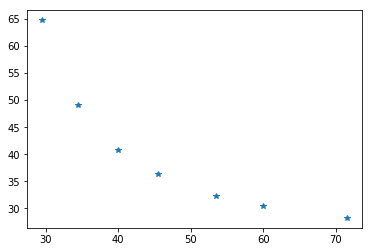

In [4]:
plt.plot(d_objet,d_image,'*')

Nous allons tracer 1/d_image en fonction de 1/d_objet puis faire un ajustement. Il faut pour cela calculer l'incertitude de ces grandeurs que nous appelons d_1_d_objet et d_1_d_image respectivement.

Pour rappel : $\Delta \frac{1}{f}=\frac{\Delta f}{f^2}$

In [5]:
d_1_d_objet = delta_lentille/d_objet**2
d_1_d_image=delta_d/d_image**2

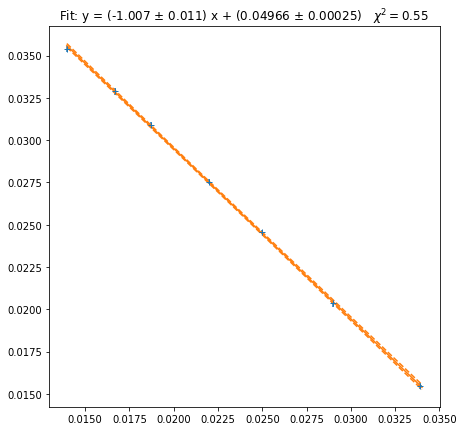

In [6]:
r=fu.linfitxy(1/d_objet,1/d_image,d_1_d_objet,d_1_d_image)

D'où, avec les notations usuelles, $\frac{1}{OA'}-(1,008±0.012)\cdot\frac{1}{OA}=0.04969±0.00025$ (en cm$^{-1}$). La relation de conjugaison n'est pas mise en défaut (ouf !) et la distance focale $f$ de la lentille est telle que $\frac{1}{f}=0.04969±0.00025\;\textrm{cm}^{-1}$ soit $f=$…

In [7]:
f=1/r[1]
delta_f=r[3]/r[2]**2
print(f,delta_f)

20.137894518071167 2.138608688608057


$f=20,1±2,1\;\textrm{cm}$

Pour ce qui concerne le grandissement :

In [8]:
grandissement=t/t0;
d_grandissement=delta_t/t0;

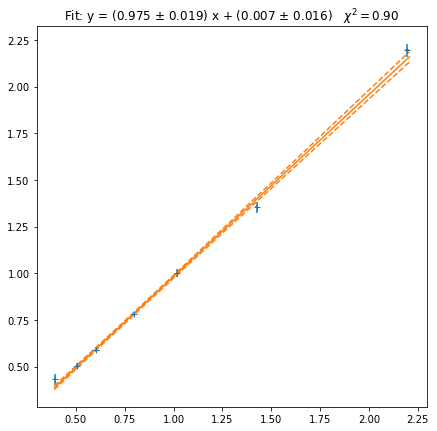

In [9]:
g=fu.linfitxy(d_image/d_objet,grandissement,np.sqrt((delta_lentille/d_objet)**2+(delta_d/d_image)**2),d_grandissement)

In [11]:
z=np.abs((g[0]-1)/g[2])
print(z)

1.3064636019989955


Le z-test (voir ci-dessus) permet de conclure que le grandissement est bien compatible avec le rapport OA' sur OA au risque de 5% (z<1.96).